In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv

ctx = mx.gpu(0)

In [2]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
filename = 'example.jpg'
gluoncv.utils.download(url, filename)

100%|██████████| 24/24 [00:00<00:00, 3294.93KB/s]


'example.jpg'

In [12]:
img = image.imread(filename)

from matplotlib import pyplot as plt
print(type(img), img.shape)

#plt.imshow(img.asnumpy())
#plt.show()

<class 'mxnet.ndarray.ndarray.NDArray'> (400, 500, 3)


In [13]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [18]:
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True, ctx=ctx)

In [19]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

[14:46:32] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable
[14:46:33] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable


In [20]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

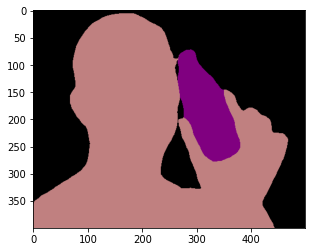

In [21]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [23]:
output.shape

(1, 21, 400, 500)

In [25]:
predict

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.],
       [15., 15., 15., ...,  0.,  0.,  0.]], dtype=float32)

In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.gpu(0)

In [2]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)


100%|██████████| 52/52 [00:00<00:00, 1192.39KB/s]


'ade20k_example.jpg'

[14:11:13] ../src/storage/storage.cc:199: Using Pooled (Naive) StorageManager for CPU


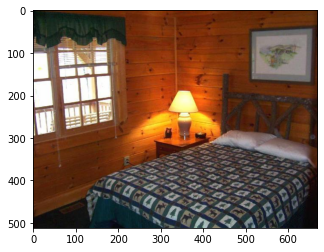

In [3]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [4]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)


[14:11:35] ../src/storage/storage.cc:199: Using Pooled (Naive) StorageManager for GPU


In [9]:
test_transform.__code__

<code object test_transform at 0x7f50f4a5d190, file "/usr/local/lib/python3.8/dist-packages/gluoncv/data/transforms/presets/segmentation.py", line 6>

In [13]:
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True, ctx=ctx)


self.crop_size 480


In [14]:

output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()


[14:14:48] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable
[14:14:48] ../src/operator/cudnn_ops.cc:292: Auto-tuning cuDNN op, set MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable


In [15]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

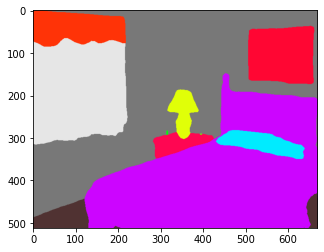

In [16]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [1]:
import numpy as np
import mxnet as mx
from mxnet import gluon, autograd
import gluoncv

In [2]:
model = gluoncv.model_zoo.get_psp(dataset='ade20k', backbone='resnet50', pretrained=False)
print(model)


57418KB [00:03, 16395.65KB/s]                           
[14:29:16] ../src/storage/storage.cc:199: Using Pooled (Naive) StorageManager for CPU


self.crop_size 480
PSPNet(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, act_type=None, bn_group=1, xbuf_ptr=0, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, act_type=None, bn_group=1, xbuf_ptr=0, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, act_type=None, bn_group=1, xbuf_ptr=0, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (layer1): Hybrid

In [3]:
from mxnet.gluon.data.vision import transforms
input_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225]),
])


In [4]:
trainset = gluoncv.data.ADE20KSegmentation(split='train', transform=input_transform)
print('Training images:', len(trainset))
# set batch_size = 2 for toy example
batch_size = 2
# Create Training Loader
train_data = gluon.data.DataLoader(
    trainset, batch_size, shuffle=True, last_batch='rollover',
    num_workers=batch_size)

Training images: 20210


In [5]:
import random
from datetime import datetime
random.seed(datetime.now())
idx = random.randint(0, len(trainset))
img, mask = trainset[idx]
from gluoncv.utils.viz import get_color_pallete, DeNormalize
# get color pallete for visualize mask
mask = get_color_pallete(mask.asnumpy(), dataset='ade20k')
mask.save('mask.png')
# denormalize the image
img = DeNormalize([.485, .456, .406], [.229, .224, .225])(img)
img = np.transpose((img.asnumpy()*255).astype(np.uint8), (1, 2, 0))

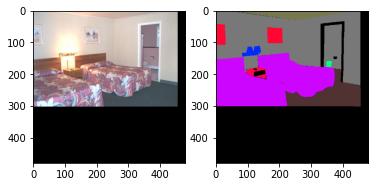

In [6]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# subplot 1 for img
fig = plt.figure()
fig.add_subplot(1,2,1)

plt.imshow(img)
# subplot 2 for the mask
mmask = mpimg.imread('mask.png')
fig.add_subplot(1,2,2)
plt.imshow(mmask)
# display
plt.show()


In [7]:
from gluoncv.loss import MixSoftmaxCrossEntropyLoss
criterion = MixSoftmaxCrossEntropyLoss(aux=True)

In [8]:
lr_scheduler = gluoncv.utils.LRScheduler(mode='poly', base_lr=0.001,
                                         nepochs=50, iters_per_epoch=len(train_data), power=0.9)

In [9]:
from gluoncv.utils.parallel import *
ctx_list = [mx.cpu(0)]
model = DataParallelModel(model, ctx_list)
criterion = DataParallelCriterion(criterion, ctx_list)


In [10]:
kv = mx.kv.create('local')
optimizer = gluon.Trainer(model.module.collect_params(), 'sgd',
                          {'lr_scheduler': lr_scheduler,
                           'wd':0.0001,
                           'momentum': 0.9,
                           'multi_precision': True},
                          kvstore = kv)


In [11]:
train_loss = 0.0
epoch = 0
for i, (data, target) in enumerate(train_data):
    with autograd.record(True):
        outputs = model(data)
        losses = criterion(outputs, target)
        mx.nd.waitall()
        autograd.backward(losses)
    optimizer.step(batch_size)
    for loss in losses:
        train_loss += loss.asnumpy()[0] / len(losses)
    print('Epoch %d, batch %d, training loss %.3f'%(epoch, i, train_loss/(i+1)))
    # just demo for 2 iters
    if i > 1:
        print('Terminated for this demo...')
        break

Epoch 0, batch 0, training loss 2.070
Epoch 0, batch 1, training loss 3.578
Epoch 0, batch 2, training loss 3.704
Terminated for this demo...
